# In this notebook we visualize part of our experiment results.

In [1]:
import pandas as pd
import numpy as np
from pathlib import Path

import matplotlib.pyplot as plt

# Visualize success rate @ N

In [2]:
import matplotlib.pyplot as plt

success_rate = [0.724 ,0.878 ,0.927 ,0.948 ,0.955 ,0.963 ,0.966 ,0.972 ,0.974 ,0.976]

success_rate_1 = [0.046,0.198,0.523,0.661,0.724,0.74,0.708,0.703,0.673,0.684]
success_rate_2 = [0.077,0.319,0.69,0.833,0.878,0.871,0.851,0.852,0.841,0.841]
success_rate_3 = [0.105,0.408,0.781,0.889,0.927,0.907,0.895,0.908,0.906,0.901]
success_rate_4 = [0.128,0.477,0.834,0.936,0.948,0.944,0.927,0.94,0.934,0.926]
success_rate_5 = [0.153,0.528,0.875,0.953,0.955,0.959,0.955,0.958,0.952,0.944]

tau = [0.1,1,5,10,50,100,500,1000,5000,10000]

n = [1,2,3,4,5,6,7,8,9,10]


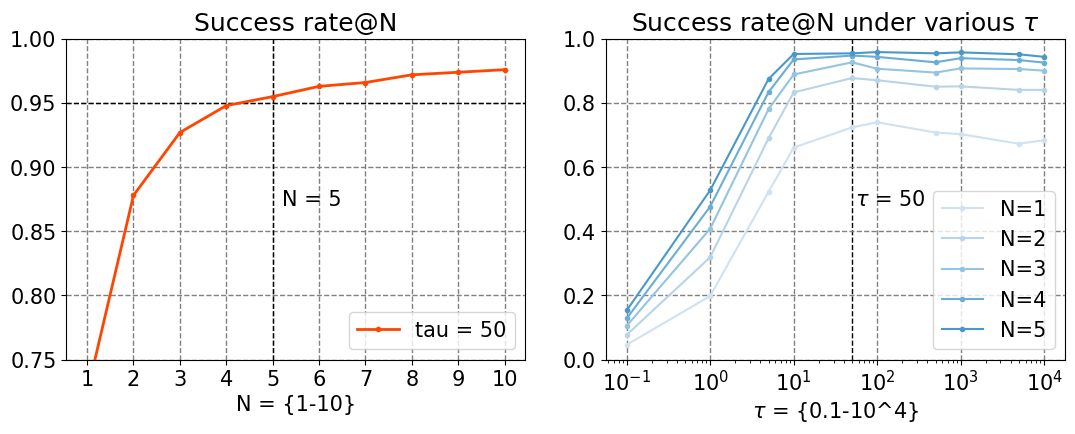

In [3]:
plt.rcParams.update({'font.size': 15})

fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2, sharex=False,figsize=(11, 4))
fig.tight_layout(pad=1.0)

ax0.set_title('Success rate@N')
ax0.plot(n,success_rate,label = 'tau = 50', linewidth=2, marker = '.', color = 'orangered',zorder=3)
ax0.set_xlabel('N = {1-10}')
ax0.set_xticks(n)
ax0.set_ylim([0.75,1])
ax0.axhline(y=0.95, color='black',linestyle = 'dashed',linewidth=1,zorder=2)
ax0.axvline(x=5, color='black',linestyle = 'dashed',linewidth=1,zorder=2)
ax0.annotate(r'N = 5', xy=(5.2, 0.87))
ax0.legend(loc="lower right")
ax0.grid(color='gray',linestyle = 'dashed',linewidth=1,zorder=0)

cmap = plt.get_cmap('Blues')

ax1.set_title(r'Success rate@N under various $\tau$')
ax1.plot(tau,success_rate_1, label = 'N=1', marker = '.', color=cmap(0.2))
ax1.plot(tau,success_rate_2, label = 'N=2', marker = '.', color=cmap(0.3))
ax1.plot(tau,success_rate_3, label = 'N=3', marker = '.', color=cmap(0.4))
ax1.plot(tau,success_rate_4, label = 'N=4', marker = '.', color=cmap(0.5))
ax1.plot(tau,success_rate_5, label = 'N=5', marker = '.', color=cmap(0.6))
ax1.set_xlabel(r'$\tau$ = {0.1-10^4}')
ax1.axvline(x=50, color='black',linestyle = 'dashed',linewidth=1,zorder=1)
ax1.set_xticks(tau)
ax1.annotate(r'$\tau$ = 50', xy=(55, 0.48))
ax1.set_xscale('log')
ax1.set_ylim([0,1])
ax1.legend(loc="lower right")
ax1.grid(color='gray',linestyle = 'dashed',linewidth=1,zorder=0)

plt.savefig("../../plots/success_rate.pdf", format="pdf", bbox_inches="tight")
plt.show()

# Visualize vector embeddings with CIGAR variants

In [4]:
data_path = '../../plots/vector_data/'

with open(data_path + 'sne_c_gas.npy', 'rb') as f:
    vector_c_gas = np.load(f)

with open(data_path + 'sne_with_finetune.npy', 'rb') as f:
    vector_with_finetune = np.load(f)

with open(data_path + 'sne_no_finetune.npy', 'rb') as f:
    vector_no_finetune = np.load(f)

In [5]:

name_action = [
"Gradle Build Action",
"Setup Miniconda",
"GitHub API Request",
"GoReleaser Action",
"Add & Commit"]

labels = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
          1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
          2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
          3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
          4, 4, 4, 4, 4, 4, 4, 4, 4, 4]

markers = ['p','^','s','+','1']

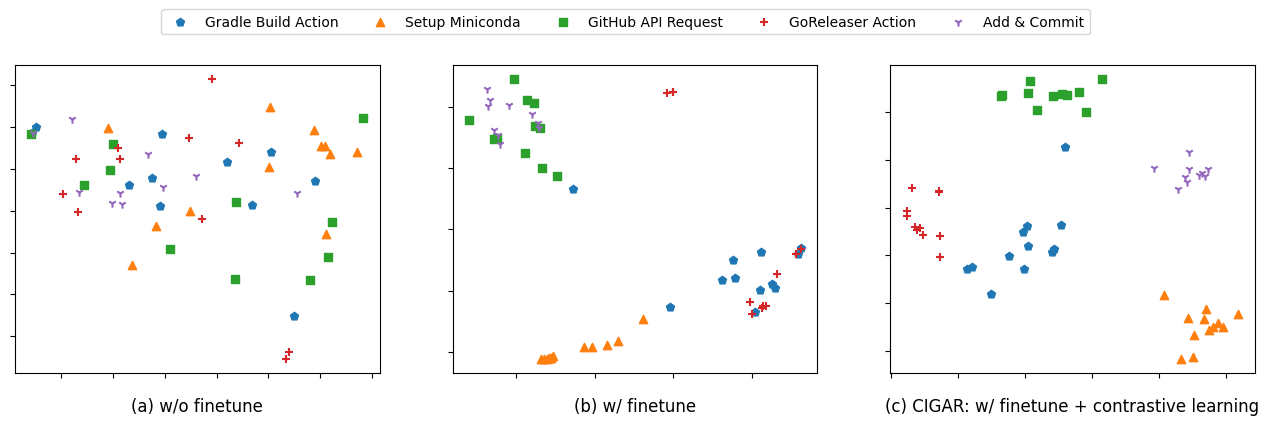

In [7]:
plt.rcParams.update({'font.size': 10})
fig, (ax0, ax1, ax2) = plt.subplots(nrows=1, ncols=3, sharex=False,figsize=(16, 4))

ax0.set_title('(a) w/o finetune',y=-0.15)
for group_idx in np.unique(labels):
    group_mask = (labels == group_idx)
    ax0.scatter(vector_no_finetune[group_mask, 0], vector_no_finetune[group_mask, 1], marker = markers[group_idx], label=f"{name_action[group_idx]}")

ax0.axes.xaxis.set_ticklabels([])
ax0.axes.yaxis.set_ticklabels([])


ax1.set_title('(b) w/ finetune',y=-0.15)
for group_idx in np.unique(labels):
    group_mask = (labels == group_idx)
    ax1.scatter(vector_with_finetune[group_mask, 0], vector_with_finetune[group_mask, 1], marker = markers[group_idx], label=f"{name_action[group_idx]}")

ax1.axes.xaxis.set_ticklabels([])
ax1.axes.yaxis.set_ticklabels([])

ax2.set_title('(c) CIGAR: w/ finetune + contrastive learning',y=-0.15)
for group_idx in np.unique(labels):
    group_mask = (labels == group_idx)
    ax2.scatter(vector_c_gas[group_mask, 0], vector_c_gas[group_mask, 1], marker = markers[group_idx], label=f"{name_action[group_idx]}")

ax2.axes.xaxis.set_ticklabels([])
ax2.axes.yaxis.set_ticklabels([])

plt.legend(loc=(-2,1.1), ncol=5)
plt.savefig("../../plots/visualization.pdf", format="pdf", bbox_inches="tight")
plt.show()